# ***Daniel Enrique Patiño Jaimes***

# Usando la base de datos de cancer de mama disponible en: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic) realizar un modelo de regresión logística que permita categorizar correctamente los registros entre pacientes sanos y no sanos.

## Librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Lectura del csv y asignación de nombres a columnas

In [ ]:
data = pd.read_csv('cancer_mama.csv')
columnas = ['id','resultado']
for i in range(1,31,1):
  columnas.append("c"+str(i))
data.columns=columnas
data

,id,resultado,c1,c2,c3,c4,c5,c6,c7,c8,...,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Eliminar columna 'c1' debido a que no representa información necesaria y modificación de los datos en la columna 'resultado' 

*   M = Maligno (M -> 1)
*   B = Benigno (B -> 0)

In [ ]:
data['resultado'] = data['resultado'].replace('M',1)
data['resultado'] = data['resultado'].replace('B',0)
data = data.drop(['id'],axis=1)
data

,resultado,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 1. Se debe visualizar relaciones entre variables usando los métodos vistos en clase

## Matriz de correlación

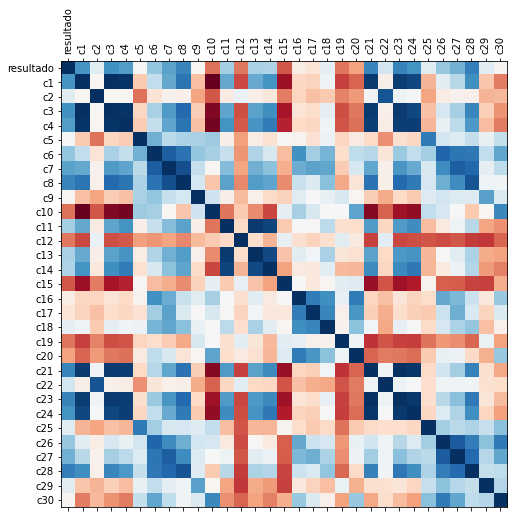

In [ ]:
corr = data.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap = 'RdBu' ,fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

## Correlación de las columnas con la columna 'resultado' en orden descendiente para identificar las columnas con mayor correlación

In [ ]:
corr_matrix = data.corr()
corr_values = corr_matrix['resultado'].sort_values(ascending=False)
print(corr_values)

resultado    1.000000
c28          0.793181
c23          0.782470
c8           0.776369
c21          0.775725
c3           0.741887
c24          0.732925
c1           0.729376
c4           0.708389
c7           0.695648
c27          0.658348
c6           0.595587
c26          0.589453
c11          0.565373
c13          0.554416
c14          0.546343
c22          0.461443
c2           0.422146
c25          0.419731
c29          0.413382
c18          0.407293
c5           0.356276
c9           0.327336
c30          0.320983
c16          0.290866
c17          0.252567
c20          0.076068
c12         -0.007024
c19         -0.009170
c10         -0.018099
c15         -0.066629
Name: resultado, dtype: float64


## Diagrama de dispersión con respecto a la columna 'resultado' la cuál contiene la información de si es benigno o maligno

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


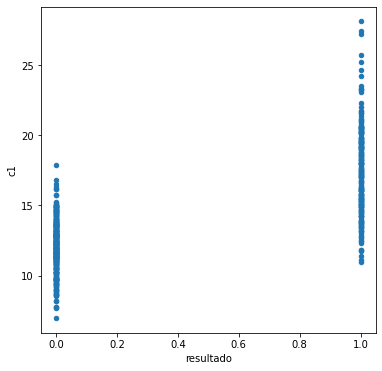

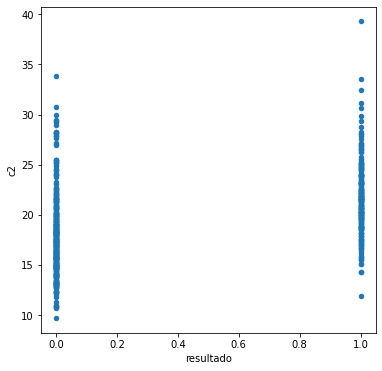

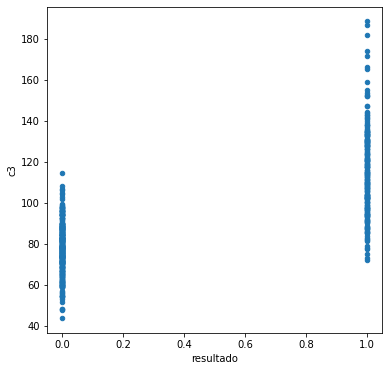

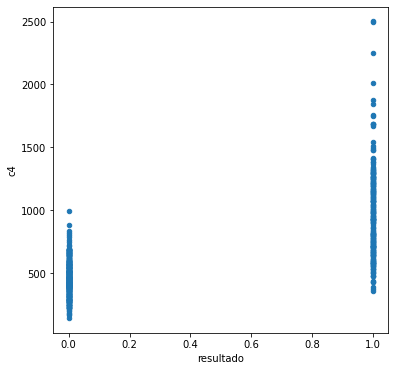

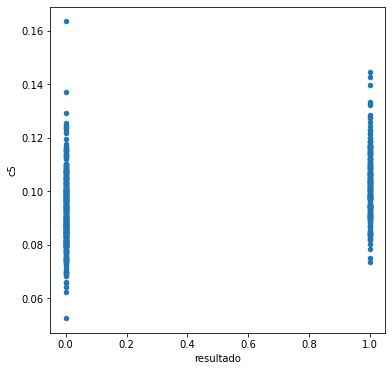

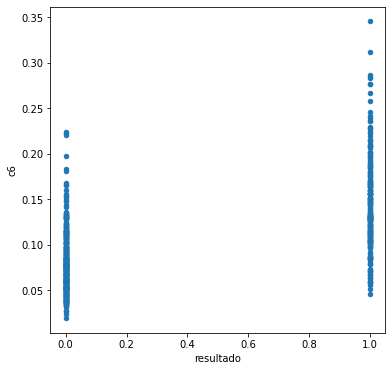

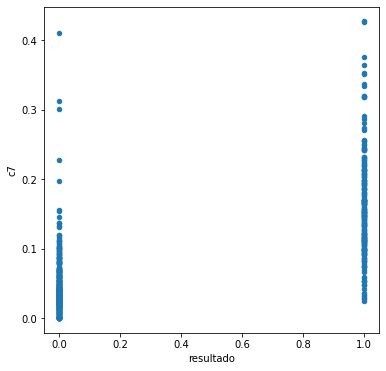

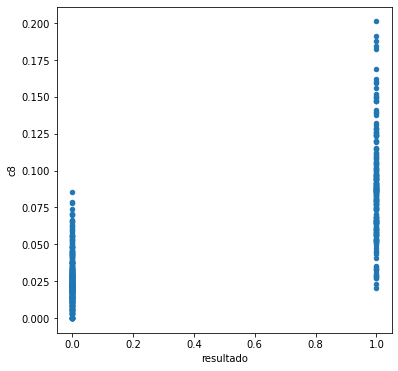

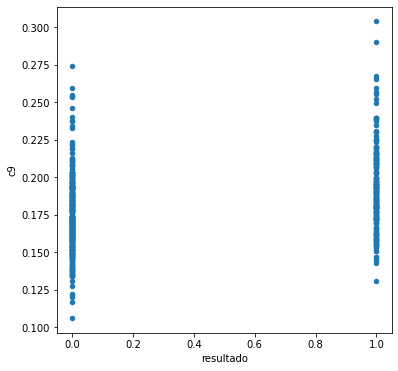

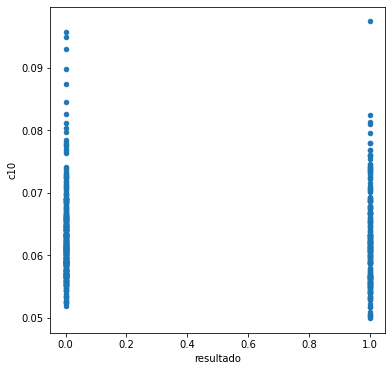

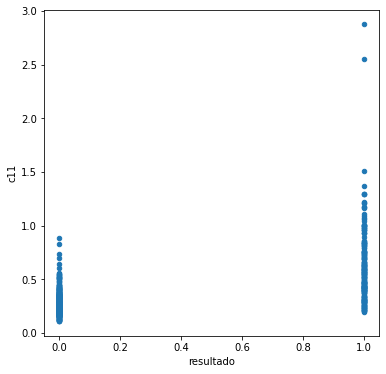

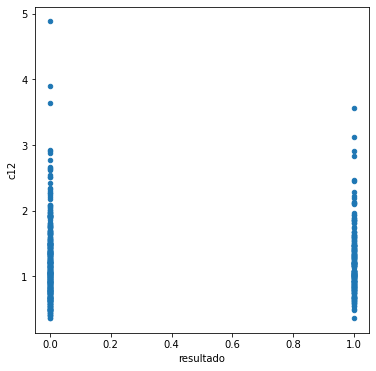

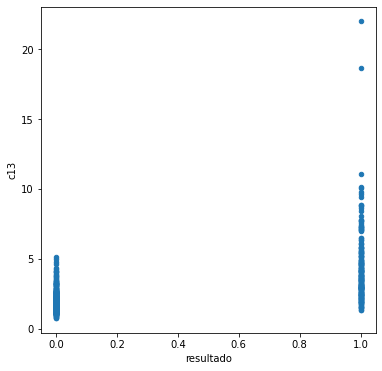

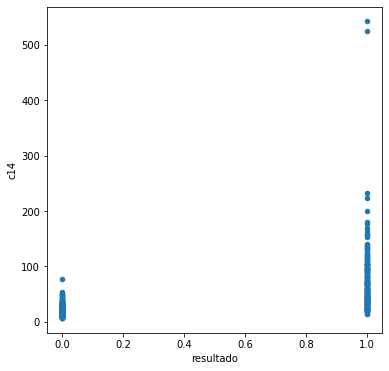

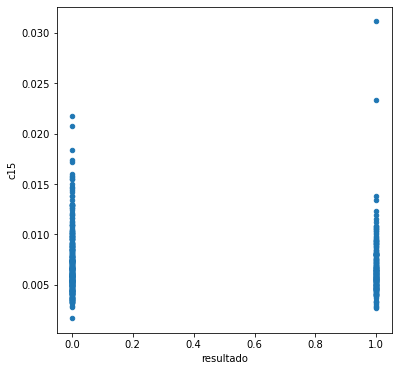

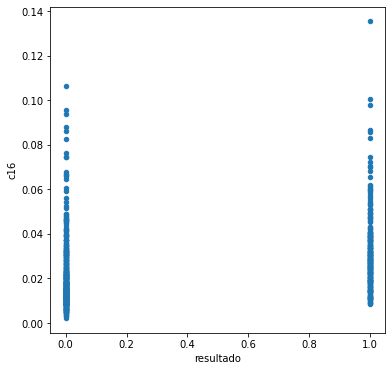

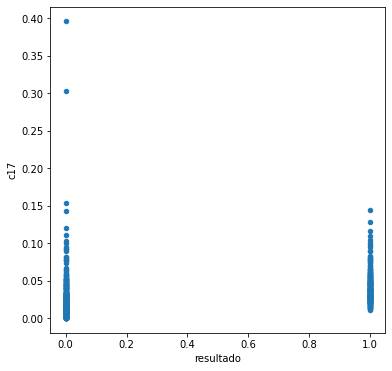

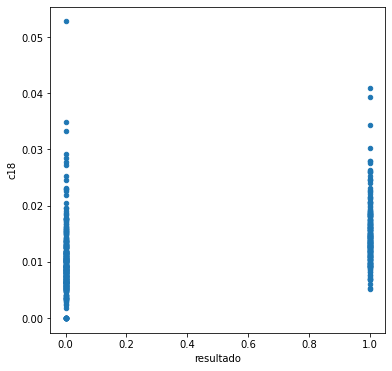

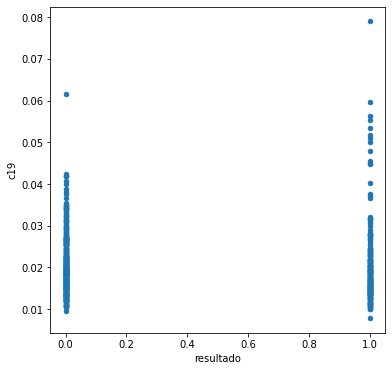

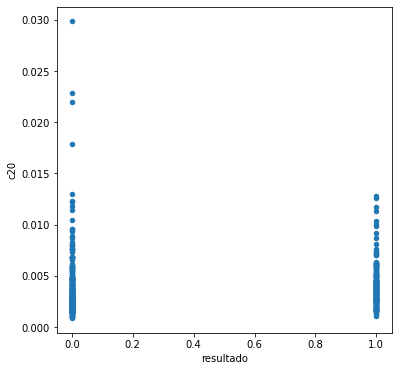

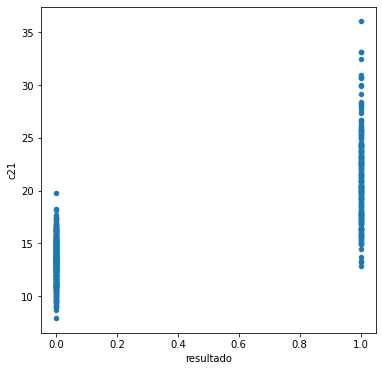

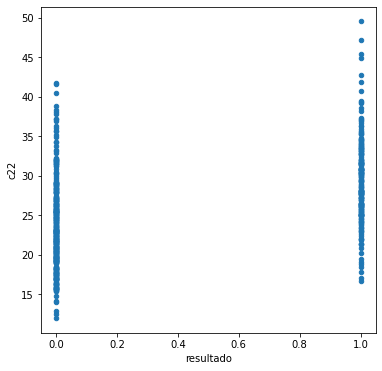

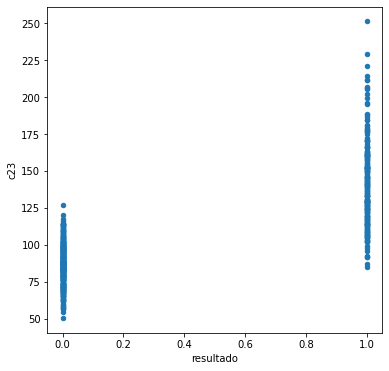

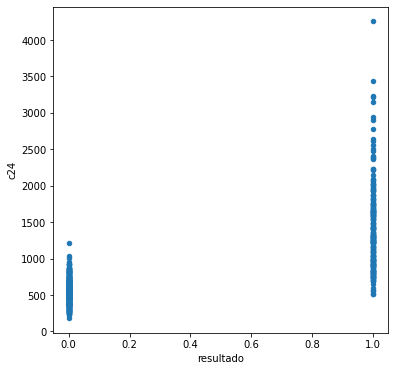

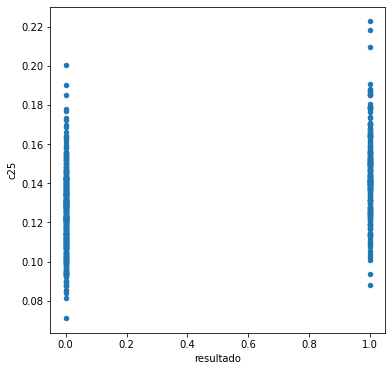

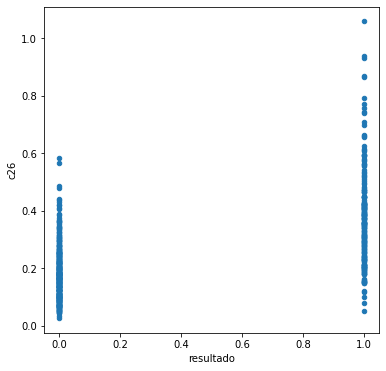

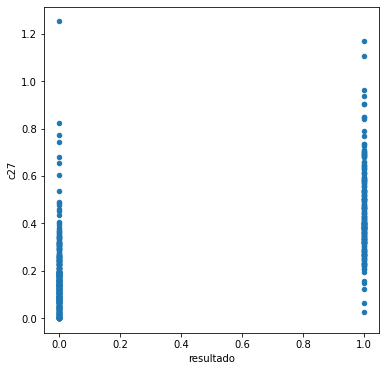

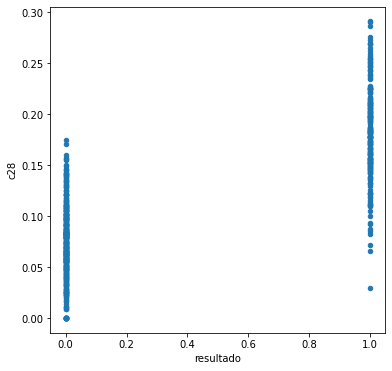

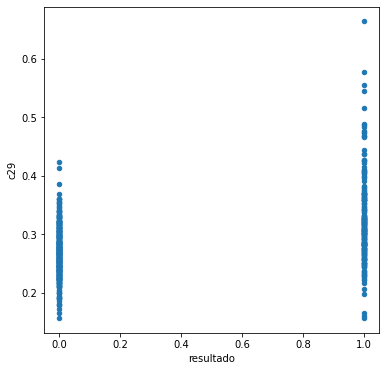

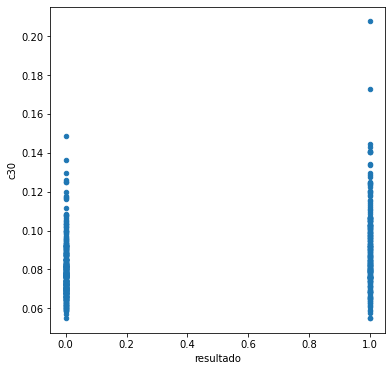

In [ ]:
for i in columnas[2:]:
  data.plot(kind='scatter',x =columnas[1],y=i,figsize=(6,6))

# 2. Encontrar valores atípicos o faltantes entre las columnas de los registros.En caso de que existan, cuantificarlos (contarlos) para conocer el número total de ellos

## Identificación de atípicos por medio de gráficas

c1        Axes(0.125,0.657941;0.133621x0.222059)
c2     Axes(0.285345,0.657941;0.133621x0.222059)
c3      Axes(0.44569,0.657941;0.133621x0.222059)
c4     Axes(0.606034,0.657941;0.133621x0.222059)
c5     Axes(0.766379,0.657941;0.133621x0.222059)
c6        Axes(0.125,0.391471;0.133621x0.222059)
c7     Axes(0.285345,0.391471;0.133621x0.222059)
c8      Axes(0.44569,0.391471;0.133621x0.222059)
c9     Axes(0.606034,0.391471;0.133621x0.222059)
c10    Axes(0.766379,0.391471;0.133621x0.222059)
c11          Axes(0.125,0.125;0.133621x0.222059)
c12       Axes(0.285345,0.125;0.133621x0.222059)
c13        Axes(0.44569,0.125;0.133621x0.222059)
c14       Axes(0.606034,0.125;0.133621x0.222059)
c15       Axes(0.766379,0.125;0.133621x0.222059)
dtype: object

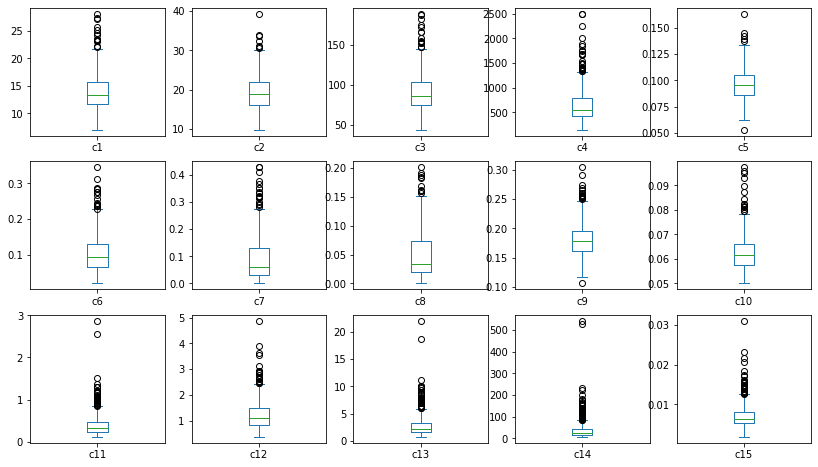

In [ ]:
boxplots_cols = columnas[2:17]
data[boxplots_cols].plot(kind='box',subplots=True,layout=(3,5),figsize=(14,8))

c16       Axes(0.125,0.657941;0.133621x0.222059)
c17    Axes(0.285345,0.657941;0.133621x0.222059)
c18     Axes(0.44569,0.657941;0.133621x0.222059)
c19    Axes(0.606034,0.657941;0.133621x0.222059)
c20    Axes(0.766379,0.657941;0.133621x0.222059)
c21       Axes(0.125,0.391471;0.133621x0.222059)
c22    Axes(0.285345,0.391471;0.133621x0.222059)
c23     Axes(0.44569,0.391471;0.133621x0.222059)
c24    Axes(0.606034,0.391471;0.133621x0.222059)
c25    Axes(0.766379,0.391471;0.133621x0.222059)
c26          Axes(0.125,0.125;0.133621x0.222059)
c27       Axes(0.285345,0.125;0.133621x0.222059)
c28        Axes(0.44569,0.125;0.133621x0.222059)
c29       Axes(0.606034,0.125;0.133621x0.222059)
c30       Axes(0.766379,0.125;0.133621x0.222059)
dtype: object

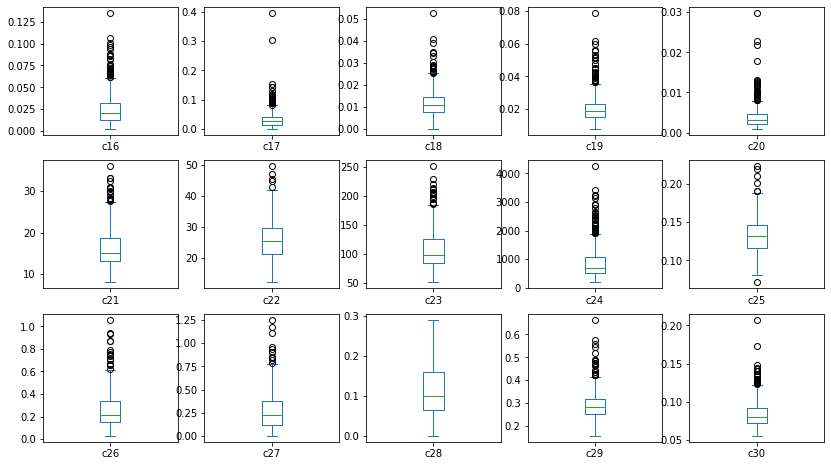

In [ ]:
boxplots_cols = columnas[17:]
data[boxplots_cols].plot(kind='box',subplots=True,layout=(3,5),figsize=(14,8))

## Cuantificación de atípicos totales

In [ ]:
atpT=0
for i in columnas[2:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.55 * IQR
  l_limit_h = Q1 - 1.55 * IQR
  '''
  data.apply() permite ejecutar una función lambda con el código que deseemos
  En este caso se usó para ubicar los valores atípicos sobre el limite superior 
  e inferiores al límite inferior, luego se aplica el .sum() para cuantificar la
  cantidad de datos encontrados
  '''
  atpU = data.apply(lambda x: x[i] > u_limit_h,axis=1).sum() #Límite superior
  atpL = data.apply(lambda x: x[i] < l_limit_h,axis=1).sum() #Límite inferior
  atpC = atpU + atpL # Cantidad de atípicos por columna
  atpT += atpU + atpL # Cantidad de atípicos total
  print('Columna:',i,'Cantidad Atípicos:',atpC)

print('Existen',atpT,'datos atípicos en total')

Columna: c1 Cantidad Atípicos: 13
Columna: c2 Cantidad Atípicos: 7
Columna: c3 Cantidad Atípicos: 13
Columna: c4 Cantidad Atípicos: 24
Columna: c5 Cantidad Atípicos: 6
Columna: c6 Cantidad Atípicos: 14
Columna: c7 Cantidad Atípicos: 17
Columna: c8 Cantidad Atípicos: 9
Columna: c9 Cantidad Atípicos: 15
Columna: c10 Cantidad Atípicos: 15
Columna: c11 Cantidad Atípicos: 36
Columna: c12 Cantidad Atípicos: 18
Columna: c13 Cantidad Atípicos: 37
Columna: c14 Cantidad Atípicos: 63
Columna: c15 Cantidad Atípicos: 28
Columna: c16 Cantidad Atípicos: 27
Columna: c17 Cantidad Atípicos: 22
Columna: c18 Cantidad Atípicos: 18
Columna: c19 Cantidad Atípicos: 27
Columna: c20 Cantidad Atípicos: 28
Columna: c21 Cantidad Atípicos: 16
Columna: c22 Cantidad Atípicos: 4
Columna: c23 Cantidad Atípicos: 13
Columna: c24 Cantidad Atípicos: 33
Columna: c25 Cantidad Atípicos: 4
Columna: c26 Cantidad Atípicos: 15
Columna: c27 Cantidad Atípicos: 11
Columna: c28 Cantidad Atípicos: 0
Columna: c29 Cantidad Atípicos: 21


# 3. Encontrar los índices de los atípicos(si existen) y cuantificar cuántos registros contienen estos tipos de datos.NOTA:es diferente encontrar el número total vs el número de registros.Por ejemplo:Únicamente la fila 7 tiene un atípico en la columna 7,10 y 15.Del anterior ejemplo podemos afirmar que un registro contiene 3 datos atípicos y para solucionar dicho problema el proceso que debemos seguir es eliminar dicho registro.

## Índices de los atípicos

In [ ]:
df = pd.DataFrame()
for i in columnas[2:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.55 * IQR
  l_limit_h = Q1 - 1.55 * IQR
  upper = np.where(data[i]>u_limit_h) # Atípicos ubicados encima del límite superior
  lower = np.where(data[i]<l_limit_h) # Atípicos ubicados debajo del límite inferior
  atp = upper + lower
  df[i]=atp
  
'''
Los índices en la fila 0 representan los índices de los atípicos ubicados encima del límite superior
Los índices en la fila 1 representan los índices de los atípicos ubicados debajo del límite inferior
'''
df

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30
0,"[81, 107, 121, 163, 179, 201, 211, 235, 338, 3...","[218, 231, 238, 258, 264, 454, 561]","[81, 107, 121, 163, 179, 201, 211, 235, 338, 3...","[22, 81, 107, 121, 163, 179, 201, 211, 235, 24...","[2, 104, 121, 503, 519]","[2, 8, 11, 77, 81, 107, 121, 180, 189, 257, 35...","[67, 77, 81, 107, 111, 121, 151, 179, 201, 211...","[77, 81, 107, 121, 179, 201, 211, 351, 460]","[2, 21, 24, 59, 77, 107, 121, 145, 149, 151, 2...","[2, 8, 67, 70, 77, 150, 151, 175, 257, 317, 37...",...,"[22, 81, 107, 163, 179, 211, 218, 235, 264, 27...","[218, 238, 258, 264]","[81, 107, 179, 235, 264, 271, 338, 351, 367, 3...","[0, 17, 22, 23, 55, 81, 107, 121, 161, 163, 17...","[2, 202, 378, 504]","[2, 8, 13, 14, 25, 32, 41, 71, 107, 180, 189, ...","[8, 67, 107, 151, 189, 251, 378, 399, 429, 561...",[],"[2, 7, 8, 21, 25, 30, 33, 34, 41, 67, 77, 118,...","[2, 4, 8, 13, 14, 25, 30, 71, 104, 117, 150, 1..."
1,[],[],[],[],[567],[],[],[],[560],[],...,[],[],[],[],[],[],[],[],[],[]


## Cuantificación de cuántos registros tienen atípicos

In [ ]:
df_registrosatp = pd.DataFrame()
for i in columnas[2:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.55 * IQR
  l_limit_h = Q1 - 1.55 * IQR
  atp = (data[i] < l_limit_h) | (data[i] > u_limit_h) # Registro con dato atípico
  df_registrosatp = pd.concat([df_registrosatp,data[atp]],ignore_index=True) # Se guarda el registro
  
df_registrosatp=df_registrosatp.drop_duplicates() # Se eliminan registros repetidos
print('Existen',df_registrosatp.shape[0],'registros con datos atípicos')

Existen 168 registros con datos atípicos


# 4. En caso que la cantidad de registros que se eliminarían supera el 40% del total del conjunto de datos, se procederá a eliminar únicamente el 20% de forma aleatoria de los atípicos

In [ ]:
resultado = data.shape[0] * 0.4
porcentaje = df_registrosatp.shape[0] / data.shape[0] * 100
print('La cantidad de registros equivalente al 40% es:',resultado,'y la cantidad de registros con datos atípicos es:',df_registrosatp.shape[0],'representando el',porcentaje,'%')

La cantidad de registros equivalente al 40% es: 227.20000000000002 y la cantidad de registros con datos atípicos es: 168 representando el 29.577464788732392 %


## Con base en lo anterior, se pueden eliminar los registros con datos atípicos

In [ ]:
print('El nuevo dataframe deberá tener ',data.shape[0]-df_registrosatp.shape[0],' registros')
new_data = data
for i in columnas[2:]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  u_limit_h = Q3 + 1.55 * IQR
  l_limit_h = Q1 - 1.55 * IQR
  atp = new_data[(new_data[i] < l_limit_h) | (new_data[i] > u_limit_h)].index
  new_data = new_data.drop(atp) # Nuevo data set sin los datos atípicos

print('La cantidad de registros en el nuevo dataframe es:',new_data.shape[0])
new_data

El nuevo dataframe deberá tener  400  registros
La cantidad de registros en el nuevo dataframe es: 400


,resultado,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30
5,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
9,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
10,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
12,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
554,0,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
557,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
559,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


# 5. El modelo debe ser validado por una validación cruzada con K=10. Dicho proceso debe ser programado de manera manual, es decir NO SE PERMITE LAS LIBRERÍAS EXTERNAS. NOTA: DEBEN GARANTIZAR LA HOMOGENEIDAD DE  LOS DATOS AL MOMENTO DE ENTRENAR EL MODELO.

## Separamos los registros según la variable objetivo (Benigno y Maligno)

### Cantidad de registros benignos y malignos

In [ ]:
new_data['resultado'].value_counts()

0    301
1     99
Name: resultado, dtype: int64

### Guardamos los registros con variable objetivo benigno y maligno en 'data_benigno' y 'data_maligno' respectivamente

In [ ]:
grupos = new_data.groupby('resultado')
data_benigno=grupos.get_group(0)
data_maligno=grupos.get_group(1)
print(data_benigno.shape[0])
print(data_maligno.shape[0])

301
99


### Calculamos la cantidad de registros que van a haber en cada k grupo

In [ ]:
print('Van a haber',new_data.shape[0]/10,'registros por grupo')

Van a haber 40.0 registros por grupo


## Creación de un dataframe con registros benignos y malignos garantizando homogeneidad

In [ ]:
data_cruzada = pd.DataFrame(columns = data.columns)
# iterar 39 veces, de 0 a 38 agregando 32 malignos y 8 benignos
for i in range(0, 39):
    data_cruzada = data_cruzada.append(data_benigno[i*8:i*8+8],ignore_index=True)
    data_cruzada = data_cruzada.append(data_maligno[i*2:i*2+2],ignore_index=True)

# tomar los registros faltantes y agregarlos
data_cruzada = data_cruzada.append(data_benigno[312:])
data_cruzada = data_cruzada.append(data_maligno[78:])
data_cruzada

<ipython-input-17-83e2af5314cf>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_cruzada = data_cruzada.append(data_benigno[i*8:i*8+8],ignore_index=True)
<ipython-input-17-83e2af5314cf>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_cruzada = data_cruzada.append(data_maligno[i*2:i*2+2],ignore_index=True)
<ipython-input-17-83e2af5314cf>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_cruzada = data_cruzada.append(data_benigno[312:])
<ipython-input-17-83e2af5314cf>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_cruzada = data_cruzada.append(data_maligno[78:])


,resultado,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30
0,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,1,15.050,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.043350,0.1561,...,17.580,28.06,113.80,967.0,0.12460,0.21010,0.28660,0.11200,0.2282,0.06954
515,1,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.094510,0.1860,...,21.860,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863
516,1,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.094310,0.1802,...,23.730,25.23,160.50,1646.0,0.14170,0.33090,0.41850,0.16130,0.2549,0.09136
535,1,14.270,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.061390,0.1926,...,15.290,34.27,104.30,728.3,0.13800,0.27330,0.42340,0.13620,0.2698,0.08351


# 6. Se debe imprimir la matriz de confusión por cada validación del numeral anterior.

In [ ]:
def confusion_matrix(y_true, y_pred):
  tp = [0,0]
  fn = [0,0]
  tn = [0,0]
  fp = [0,0]
  sensibilidad = 0
  especificidad = 0
  precision = 0
  for i in range(len(y_true)):
      if y_true[i] == 0 and y_pred[i] == 0: # Verdadero negativo
          tp[0]+=1
          tn[1]+=1
      elif y_true[i] == 0 and y_pred[i] == 1: # Falso positivo
          fp[0]+=1
          fn[1]+=1
      elif y_true[i] == 1 and y_pred[i] == 0: # Falso negativo
          fp[1]+=1
          fn[0]+=1
      elif y_true[i] == 1 and y_pred[i] == 1: # Verdadero positivo
          tp[1]+=1
          tn[0]+=1

  sensibilidad = tp[1]/(tp[1]+fn[1])
  especificidad = tn[1]/(tn[1]+fp[1])
  precision = tp[1]/(tp[1]+fp[1])

  confusion = pd.DataFrame({
    "Resultado":["Benigno","Maligno"],
    "TP": tp,
    "FN":fn,
    "TN":tn,
    "FP":fp
  })
  return confusion,sensibilidad,especificidad,precision


# 7. El desempeño de este modelo debe ser encontrado al calcular las métricas de sensibilidad, especificidad y precisión.

## Creación modelo 0

In [ ]:
espe0 = 0
sen0 = 0

for i in range(0,len(new_data),40):
  data_test = data_cruzada.iloc[i:i+40]
  data_train =  pd.concat([data_cruzada.iloc[:i],data_cruzada.iloc[i+40:]])
  x_train = data_train.iloc[:,[8,21,23,28]].values
  x_test = data_train.iloc[:,[8,21,23,28]].values

  y_train = data_train.iloc[:, 0].values.astype('int')
  y_test = data_test.iloc[:, 0].values.astype('int')

  modelo = KNeighborsClassifier(n_neighbors=5)
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  matriz,s,e,p = confusion_matrix(y_test,y_pred)
  print(matriz)
  print('Sensibilidad:',s)
  print('Especificidad:',e)
  print('Precision:',p)
  espe0 += e
  sen0 += s

#Promedio de la especificidad y la sensibilidad
espe0 = 1 - (espe0/10)
sen0 = sen0/10

  Resultado  TP  FN  TN  FP
0   Benigno  30   4   4   2
1   Maligno   4   2  30   4
Sensibilidad: 0.6666666666666666
Especificidad: 0.8823529411764706
Precision: 0.5
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   2   6   0
1   Maligno   6   0  32   2
Sensibilidad: 1.0
Especificidad: 0.9411764705882353
Precision: 0.75
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   

# 8. Deben desarrollar al menos 4 modelos diferentes en busca del mejor desempeño posible (Se debe evidenciar la numerosas pruebas realizadas) y decidir en base de una curva ROC cual de ellos es mejor

## Para la creación de cada modelo se usaron las características que superan el 70% de correlación

## Modelo 1

In [ ]:
espe1 = 0
sen1 = 0
for i in range(0,len(new_data),40):
  caracteristicas= [1,3,8,21,23,24,28]
  data_test = data_cruzada.iloc[i:i+40]
  data_train =  pd.concat([data_cruzada.iloc[:i],data_cruzada.iloc[i+40:]])
  x_train = data_train.iloc[:,caracteristicas].values
  x_test = data_train.iloc[:,caracteristicas].values

  y_train = data_train.iloc[:, 0].values.astype('int')
  y_test = data_test.iloc[:, 0].values.astype('int')

  modelo = KNeighborsClassifier(n_neighbors=5)
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  matriz,s,e,p = confusion_matrix(y_test,y_pred)
  espe1 += e
  sen1 += s

espe1 = 1 - (espe1/10)
sen1 = sen1/10

## Modelo 2

In [ ]:
espe2 = 0
sen2 = 0
for i in range(0,len(new_data),40):
  caracteristicas= [1,3,8,21]
  data_test = data_cruzada.iloc[i:i+40]
  data_train =  pd.concat([data_cruzada.iloc[:i],data_cruzada.iloc[i+40:]])
  x_train = data_train.iloc[:,caracteristicas].values
  x_test = data_train.iloc[:,caracteristicas].values

  y_train = data_train.iloc[:, 0].values.astype('int')
  y_test = data_test.iloc[:, 0].values.astype('int')

  modelo = KNeighborsClassifier(n_neighbors=5)
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  matriz,s,e,p = confusion_matrix(y_test,y_pred)
  espe2 += e
  sen2 += s

espe2 = 1 - (espe2/10)
sen2 = sen2/10

## Modelo 3

In [ ]:
espe3 = 0
sen3 = 0
for i in range(0,len(new_data),40):
  caracteristicas= [21,23,24,28]
  data_test = data_cruzada.iloc[i:i+40]
  data_train =  pd.concat([data_cruzada.iloc[:i],data_cruzada.iloc[i+40:]])
  x_train = data_train.iloc[:,caracteristicas].values
  x_test = data_train.iloc[:,caracteristicas].values

  y_train = data_train.iloc[:, 0].values.astype('int')
  y_test = data_test.iloc[:, 0].values.astype('int')

  modelo = KNeighborsClassifier(n_neighbors=5)
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  matriz,s,e,p = confusion_matrix(y_test,y_pred)
  espe3 += e
  sen3 += s

espe3 = 1 - (espe3/10)
sen3 = sen3/10

## Modelo 4

In [ ]:
espe4 = 0
sen4 = 0

for i in range(0,len(new_data),40):
  caracteristicas= [8,21,23]
  data_test = data_cruzada.iloc[i:i+40]
  data_train =  pd.concat([data_cruzada.iloc[:i],data_cruzada.iloc[i+40:]])
  x_train = data_train.iloc[:,caracteristicas].values
  x_test = data_train.iloc[:,caracteristicas].values

  y_train = data_train.iloc[:, 0].values.astype('int')
  y_test = data_test.iloc[:, 0].values.astype('int')

  modelo = KNeighborsClassifier(n_neighbors=5)
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  matriz,s,e,p = confusion_matrix(y_test,y_pred)
  espe4 += e
  sen4 += s

espe4 = 1 - (espe4/10)
sen4 = sen4/10

## Curva ROC

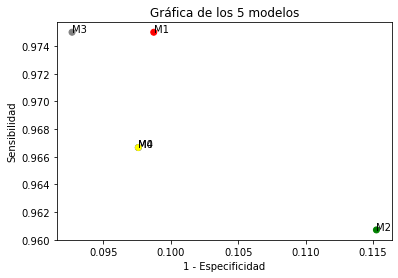

In [ ]:
roc_x = [espe0,espe1,espe2,espe3,espe4]
roc_y = [sen0,sen1,sen2,sen3,sen4]
nombres = ['M0','M1','M2','M3','M4']
colores = ['blue','red', 'green', 'grey', 'yellow']

plt.scatter(roc_x, roc_y,c=colores)

for i, nombre in enumerate(nombres):
    plt.annotate(nombre, (roc_x[i], roc_y[i]))

plt.title('Gráfica de los 5 modelos')
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')

plt.show()

### Mejor modelo KNN

In [ ]:
# calcular la distancia de cada punto a la esquina superior izquierda donde tendrá la mejor especificidad y sensibilidad
distancias = []
for p in range(0,len(nombres)):
    distancia = math.sqrt((0 - roc_x[p])**2 + (1 - roc_y[p])**2)
    distancias.append(distancia)

# obtener el índice del punto más cercano
indice = distancias.index(min(distancias))

# obtener el punto más cercano
punto_mas_cercano = nombres[indice]

print("El mejor modelo es:", punto_mas_cercano)
print(distancias)

El mejor modelo es: M3
[0.10312913522360984, 0.10185317360079563, 0.1217634621861438, 0.09598949560766289, 0.10312913522360984]


### Mejor modelo regresión logística

In [ ]:
loge = 0
logs = 0

for i in range(0,len(new_data),40):
  data_test = data_cruzada.iloc[i:i+40]
  data_train =  pd.concat([data_cruzada.iloc[:i],data_cruzada.iloc[i+40:]])
  x_train = data_train.iloc[:,[8,21,23,28]].values
  x_test = data_train.iloc[:,[8,21,23,28]].values

  y_train = data_train.iloc[:, 0].values.astype('int')
  y_test = data_test.iloc[:, 0].values.astype('int')

  modelo = LogisticRegression()
  modelo.fit(x_train,y_train)
  y_pred = modelo.predict(x_test)
  matriz,s,e,p = confusion_matrix(y_test,y_pred)
  print(matriz)
  print('Sensibilidad:',s)
  print('Especificidad:',e)
  print('Precision:',p)
  loge += e
  logs += s

#Promedio de la especificidad y la sensibilidad
loge = 1 - (loge/10)
logs = logs/10

  Resultado  TP  FN  TN  FP
0   Benigno  30   4   4   2
1   Maligno   4   2  30   4
Sensibilidad: 0.6666666666666666
Especificidad: 0.8823529411764706
Precision: 0.5
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   2   6   0
1   Maligno   6   0  32   2
Sensibilidad: 1.0
Especificidad: 0.9411764705882353
Precision: 0.75
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   7   0  32   1
Sensibilidad: 1.0
Especificidad: 0.9696969696969697
Precision: 0.875
  Resultado  TP  FN  TN  FP
0   Benigno  32   1   7   0
1   Maligno   

# Fusión Modelos KNN y regresión logística

In [ ]:
caracteristicas = new_data[columnas[2:]]
x_train,x_test,y_train,y_test = train_test_split(caracteristicas,new_data['resultado'], train_size= 0.5)

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_train[['c21','c23','c24','c28']],y_train)
y_pred_knn = modelo_knn.predict(x_test[['c21','c23','c24','c28']])

modelo_log = LogisticRegression()
modelo_log.fit(x_train[['c8','c21','c23','c28']],y_train)
y_pred_log = modelo_log.predict(x_test[['c8','c21','c23','c28']])

y_test = np.array(y_test)

## AND

In [ ]:
fus_and=[]
for i in range(0,len(y_pred_knn)):
  if ((y_pred_knn[i] == 1) & (y_pred_log[i] == 1)):
    fus_and.append(1)
  else:
    fus_and.append(0)

matriz,s,e,p = confusion_matrix(y_test,fus_and)
print(matriz)
print('Sensibilidad:',s)
print('Especificidad:',e)
print('Precision:',p)

  Resultado   TP  FN   TN  FP
0   Benigno  147  15   35   3
1   Maligno   35   3  147  15
Sensibilidad: 0.9210526315789473
Especificidad: 0.9074074074074074
Precision: 0.7


## OR

In [ ]:
fus_or=[]
for i in range(0,len(y_pred_knn)):
  if ((y_pred_knn[i] == 1) | (y_pred_log[i] == 1)):
    fus_or.append(1)
  else:
    fus_or.append(0)

matriz,s,e,p = confusion_matrix(y_test,fus_or)
print(matriz)
print('Sensibilidad:',s)
print('Especificidad:',e)
print('Precision:',p)

  Resultado   TP  FN   TN  FP
0   Benigno  142  12   38   8
1   Maligno   38   8  142  12
Sensibilidad: 0.8260869565217391
Especificidad: 0.922077922077922
Precision: 0.76
